# Demonstration: Analysis of example cattle dataset
## Import relevant packages and modules

In [1]:
from MSvaluesPy import msvalues
import numpy as np
import pandas as pd
import time

## Import example data
Two main input data are required to use most functions in the [`msvalues`](docs_msvalues.md) module:
1. `marker map and marker effects`: This should be provided as a data frame with named columns. The first three columns must be the marker index (ranging from 1 to the total number of markers on the genome), chromosome number, and the marker position (in cM or bp, but preferably cM). The remaining columns should be the marker effects for each trait.
The marker map and marker effects file or data for a single trait should be formatted as follows:

In [2]:
inputfile1st = msvalues.testinputfile1st()
print(inputfile1st)

         SNP  Chr         cM       fat
0          1    1   0.113641  0.000059
1          2    1   0.244698 -0.000051
2          3    1   0.369418  0.000034
3          4    1   0.447277  0.000026
4          5    1   0.487653  0.000021
...      ...  ...        ...       ...
39775  39776   29  51.899151 -0.000104
39776  39777   29  51.920849  0.000205
39777  39778   29  51.986600  0.000034
39778  39779   29  52.030414 -0.000148
39779  39780   29  52.112161 -0.000059

[39780 rows x 4 columns]


and for multiple traits as follows:

In [3]:
inputfile1mt = msvalues.testinputfile1mt()
print(inputfile1mt)

         SNP  Chr         cM       fat        pH   protein
0          1    1   0.113641  0.000059 -0.000163 -0.000211
1          2    1   0.244698 -0.000051 -0.000773 -0.000006
2          3    1   0.369418  0.000034 -0.000047 -0.000075
3          4    1   0.447277  0.000026  0.000101 -0.000118
4          5    1   0.487653  0.000021  0.000066  0.000075
...      ...  ...        ...       ...       ...       ...
39775  39776   29  51.899151 -0.000104 -0.000078 -0.000017
39776  39777   29  51.920849  0.000205 -0.000145 -0.000053
39777  39778   29  51.986600  0.000034  0.000025  0.000043
39778  39779   29  52.030414 -0.000148 -0.000033 -0.000003
39779  39780   29  52.112161 -0.000059 -0.000004  0.000013

[39780 rows x 6 columns]


2. `ID, sex and phased genotypic data`: This should be a two-dimensional character array. This file should contain no column or row names. The number of rows should be equal to the number of individuals, and the number of columns should be two plus the total number of markers (i.e., the first column must be individual ID, the second column must be the sex (coded 1 for male and 2 for female) and the remaining marker genotypes. The phased genotypic data must be coded using 1, 2, 3, and 4, with 1 and 2 representing homozygous dominant and recessive markers, and 3 and 4 representing heterozygous markers. Example data for a single sex is as follows:

In [4]:
inputfile2ss = msvalues.testinputfile2ss()
print(inputfile2ss)

[['1' '1' '4' ... '1' '4' '1']
 ['2' '1' '1' ... '1' '3' '4']
 ['3' '1' '1' ... '3' '4' '1']
 ...
 ['263' '1' '1' ... '4' '3' '1']
 ['264' '1' '4' ... '3' '1' '1']
 ['265' '1' '1' ... '4' '1' '1']]


and data containing both sexes as follows:

In [5]:
inputfile2ms = msvalues.testinputfile2ms()
print(inputfile2ms)

[['1' '1' '4' ... '1' '4' '1']
 ['2' '2' '1' ... '1' '3' '4']
 ['3' '2' '1' ... '3' '4' '1']
 ...
 ['263' '2' '1' ... '4' '3' '1']
 ['264' '2' '4' ... '3' '1' '1']
 ['265' '2' '1' ... '4' '1' '1']]


Note that all individuals were females in the example dataset of Musa and Reinsch (2021). In inputfile2ms, sex was randomly assigned for demonstration purposes. 

## File check
It is advisable to check the input files or data mentioned above for errors using the function msvalues.fileschecks. This requires two additional inputs: number of traits (as integer) and index weights (as an array). The index weights must be in the order of estimated marker effects provided in marker map and effects data frame.

In [6]:
no_traits = 3                       # integer
index_wt = np.array((1.0,1.0,1.0))  # array   
# perform quality checks
msvalues.fileschecks(inputfile1mt, inputfile2ms, no_traits, index_wt)  

Input files or data passed the file check test!
Number of individuals:  265
Number of chromosomes:  29
Total no. markers:  39780
Number of trait(s):  3
Trait name(s) and Index weight(s)
fat :  1.0
pH :  1.0
protein :  1.0


## Setting up the population covariance matrix
This is done using the function msvalues.popcovmat. This requires two inputs: marker map data and marker position unit (options are 'cM' and 'bp'). If bp is chosen as the marker position unit, the function converts the marker position to Mbp.

In [7]:
mposunit = 'cM'
start = time.time()
CovMat = msvalues.popcovmat(inputfile1mt, mposunit)
print('Time taken: ', round(time.time() - start, 2), 'secs')

Time taken:  2.08 secs


## Estimation of Mendelian sampling (co)variance and aggregate breeding value
This can be done obtained using the function msvalues.MSvarcov. It requires information on marker map, marker effects, ID, sex and phased genotypes, population covariance matrix (derived using msvalues.popcovmat) and index weights. If progress is True, the function prints the progress of the calculations.

In [9]:
start = time.time()
MSVMSC = msvalues.MSvarcov(inputfile1mt, inputfile2ms, CovMat, index_wt, progress = True)
print('Time taken: ', round(time.time() - start, 2), 'secs')
print(MSVMSC)

Progress (%): 25  50  75  100  
Time taken:  31.21 secs
    Animal_ID  Sex       fat    pH_fat        pH  protein_fat  protein_pH  \
0           1    1  0.000466  0.000154  0.001805     0.000136   -0.000157   
1           2    2  0.023262  0.014908  0.013225     0.017306    0.011082   
2           3    2  0.021665  0.013760  0.010475     0.015662    0.009849   
3           4    1  0.000949  0.000317  0.004836    -0.000044   -0.000158   
4           5    2  0.021892  0.014447  0.012676     0.015576    0.010120   
..        ...  ...       ...       ...       ...          ...         ...   
260       261    1  0.022112  0.012953  0.010050     0.017090    0.009524   
261       262    1  0.023853  0.016183  0.012896     0.017691    0.012189   
262       263    2  0.000604  0.000096  0.002694     0.000025    0.000126   
263       264    2  0.022809  0.015301  0.012748     0.017123    0.011174   
264       265    2  0.022491  0.016226  0.013892     0.016460    0.011973   

      protein    Ag

## Estimation of selection criteria
1. `Gametic approach`: This can be done obtained using the function msvalues.SelStratGam. It requires information on selstrat (options are 'GEBV', 'PBTI', and 'RPTA'), marker map, marker effects, ID, sex and phased genotypes, Mendelian sampling (co)variance data frame, index weights, and selinorthresh. If selstrat is PBTI, a selinorthresh of value 0.05 sets threshold at top 5% of GEBV. If selstrat is RPTA, a selinorthresh of value 1.5 sets selection intensity to 1.5.

In [10]:
selstrat = 'RPTA'
selinorthresh = 1.5
start = time.time()
Gam = msvalues.SelStratGam(selstrat, inputfile1mt, inputfile2ss, MSVMSC, index_wt, selinorthresh)
print('Time taken: ', round(time.time() - start, 2), 'secs')
print(Gam)

Time taken:  14.84 secs
    Animal_ID  Sex       fat        pH   protein   Overall
0           1    1  0.167868 -0.043638  0.218103  0.278515
1           2    1  0.230470  0.030054  0.252967  0.485484
2           3    1  0.208225  0.144644  0.245587  0.577554
3           4    1  0.201003  0.095271  0.108572  0.327917
4           5    1  0.264241  0.034165  0.070406  0.341901
..        ...  ...       ...       ...       ...       ...
260       261    1  0.122000  0.116194  0.078259  0.292295
261       262    1  0.132215  0.171069  0.087946  0.374106
262       263    1  0.147349  0.270235  0.154555  0.505635
263       264    1  0.124096  0.137870  0.104934  0.344295
264       265    1  0.097010  0.218557  0.078350  0.377162

[265 rows x 6 columns]


2. `Zygotic approach`: This can be done obtained using the function msvalues.SelStratZyg. It requires the same information as the msvalues.SelStratGam function and two additional inputs: selintmale and selintfemale. The latter two inputs indicate the percentage of top males and females to be selected, respectively. For example, selintmale of 0.1 selects the top 10% of males with the highest value of the chosen selstrat. It is worth noting that a male is only allowed to mate with a maximum of 50 females. Gametic estimates of chosen selection strategy are saved to the current working directory.

In [12]:
selintmale = 0.1
selintfemale = 1
start = time.time()
Zyg = msvalues.SelStratZyg(selstrat, inputfile1mt, inputfile2ms, MSVMSC, index_wt, selinorthresh, selintmale, selintfemale)  
print('Time taken: ', round(time.time() - start, 2), 'secs')
print(Zyg)

Time taken:  29.44 secs
    SireID DamID SireIndex DamIndex        RPTA       GEBV       MSV
0      231     2       230        1    0.903288   0.145982  0.254894
1      231     3       230        2     1.00314   0.266595   0.24111
2      231     5       230        4    0.765259  0.0229644   0.24489
3      231     7       230        6     1.13276   0.610606  0.121175
4      231    10       230        9    0.774431    0.24908  0.122664
..     ...   ...       ...      ...         ...        ...       ...
120    154   254       153      253     0.64597  -0.132418  0.269283
121    154   260       153      259  0.00552254  -0.568548   0.14647
122    154   263       153      262     1.02465   0.447892  0.147844
123    154   264       153      263    0.636119  -0.157456  0.279894
124    154   265       153      264    0.668027  -0.127812  0.281493

[125 rows x 7 columns]


## Derivation of similarity matrices based on Mendelian sampling values
1. `Gametic approach`: This can be done obtained using the function msvalues.SimMatGam. It requires information on marker map, marker effects, phased genotypes, index weights, population covariance matrix, and chromosomes of interest (chrinterest; options are either 'all', 'none' or a list [4,14] if the user is interested in chromosomes 4 and 14 only. If chrinterest is 'all' or 'none', all or none of the chromosome-wise similarity matrices are saved to file. If stdsim=True, standardized similarity matrix is output. If progress = True, the progress of the calculations is printed to screen.

In [13]:
chrinterest = [1,2,3]
start = time.time()
simmatgam = msvalues.SimMatGam(inputfile1mt, inputfile2ss, index_wt, CovMat, chrinterest, stdsim = True, progress= True)
print('Time taken: ', round(time.time() - start, 2), 'secs')
print(np.round(simmatgam, 6))

Progress (%): 25  50  75  100  
Progress (%): 25  50  75  100  
Progress (%): 25  50  75  100  
Progress (%): 25  50  75  100  
Time taken:  9.95 secs
[[1.       0.202679 0.196647 ... 0.59824  0.164937 0.177769]
 [0.202679 1.       0.980137 ... 0.258278 0.984033 0.982884]
 [0.196647 0.980137 1.       ... 0.251296 0.981482 0.977632]
 ...
 [0.59824  0.258278 0.251296 ... 1.       0.1971   0.223957]
 [0.164937 0.984033 0.981482 ... 0.1971   1.       0.986573]
 [0.177769 0.982884 0.977632 ... 0.223957 0.986573 1.      ]]


2. `Zygotic approach`: This can be done obtained using the function msvalues.SimMatZyg. It requires the same information as the gametic function msvalues.SimMatGam. In addition, it also requires the data frame produced using the function msvalues.SelStratZyg. 

In [15]:
start = time.time()
simmatzyg = msvalues.SimMatZyg(inputfile1mt, inputfile2ms, index_wt, Zyg, CovMat, chrinterest, stdsim = False, progress= False)
print('Time taken: ', round(time.time() - start, 2), 'secs')
print(np.round(simmatzyg, 6))

Time taken:  13.56 secs
[[0.254894 0.245217 0.247129 ... 0.13164  0.260162 0.260788]
 [0.245217 0.24111  0.240456 ... 0.131087 0.25288  0.253117]
 [0.247129 0.240456 0.24489  ... 0.13086  0.255206 0.255921]
 ...
 [0.13164  0.131087 0.13086  ... 0.147844 0.1477   0.148484]
 [0.260162 0.25288  0.255206 ... 0.1477   0.279894 0.278832]
 [0.260788 0.253117 0.255921 ... 0.148484 0.278832 0.281493]]


## Optimum mate allocation
1. `Gametic approach`: This can be done obtained using the function msvalues.OptiMateAllocGam. The required inputs are data frame produced using msvalues.SelStratGam function, similarity matrix, and maximum allocation (maxalloc) of mates. maxalloc of 1 allows the allocation of 100% weight to an individual whereas 0.05 allows 5% maximum weight allocation. If progress=True, the progress of the calculations is printed to screen. Note that individuals must be same sex otherwise the fucntion produces an error. The msvalues.OptiMateAllocGam function outputs the expected risk and returns, as well as optimal allocation of weights.

Optimizing portfolios
Mate allocation optimized
Time taken:  3.19 secs


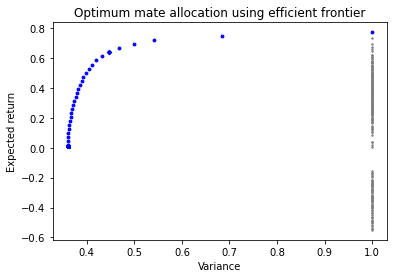

In [17]:
maxalloc = 1
start = time.time()
Portfolio, OptimizedWeight = msvalues.OptiMateAllocGam(Gam, simmatgam, maxalloc, progress = False)
print('Time taken: ', round(time.time() - start, 2), 'secs')

2. `Zygotic approach`: This can be done obtained using the function msvalues.OptiMateAllocZyg. The required inputs are the same as the gametic approach except that the quantities must be estimated using functions for zygotic approach. 

Optimizing portfolios
Mate allocation optimized
Time taken:  2.28 secs


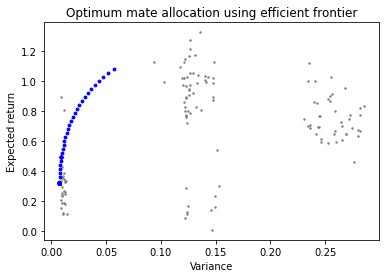

In [21]:
maxalloc = 0.05
start = time.time()
Portfolio, OptimizedWeight =  msvalues.OptiMateAllocZyg(Zyg, simmatzyg, maxalloc, progress = True)
print('Time taken: ', round(time.time() - start, 2), 'secs')